From http://giusedroid.blogspot.com/2015/04/blog-post.htmld
Quickie: Mix up OpenCV and Jupyter (iPython Notebook)

The purpose of this post is to show how to plot images acquired with opencv rather than matplotlib. Just in case. 
First of all, set matplotlib inline and import the necessary stuff.

In [ ]:
! wget --no-check-certificate http://www.hobieco.com/linked_images/H18-Magnum.jpg

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

In [ ]:
image = cv2.imread("H18-Magnum.jpg")
fig, ax = plt.subplots()
fig.set_size_inches(3, 3)
ax.axis([35, 150, 250, 100])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR. Matplotlib's plot expects an RGB image so, for a correct display of the image, it is necessary to swap those channels. This operation can be done either by using openCV conversion functions cv2.cvtColor() or by working directly with the numpy array.
cvtColor
cvtColor is the openCV function which changes the color space of an image. It takes as input an image and a numerical flag which represents the conversion function. Let's list some of that.

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('H18-Magnum.jpg', 'r')
imshow(np.asarray(pil_im))

In [ ]:
from IPython.display import Image 
Image(filename='H18-Magnum.jpg')

In [ ]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
print BGRflags

In this case it's necessary to change the image space from BGR (Blue, Green, Red) to RGB, so the correct flag is cv2.COLOR_BGR2RGB

In [ ]:
t0 = t.time()
cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
t1 = t.time()
dt_cv = t1-t0
print "Conversion took %0.5f seconds" % dt_cv

In [ ]:
plt.imshow(cv_rgb)
plt.show()

below from from http://matplotlib.org/users/text_intro.html

In [ ]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

# Added Friday afternoon 17 Mar 17

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
image = cv2.imread("Screenshot_2016-02-23-12-47-43.png")
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
#ax.axis([1280, 1400, 400, 200])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [ ]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 2))
up_right_gray_target = image_gray[210:310, 1280:1400]
plt.imshow(up_right_gray_target, cmap = cm.gray)
plt.show()

In [ ]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 2))
low_left_gray_target = image_gray[2412:2512,65:165]
plt.imshow(low_left_gray_target, cmap = cm.gray)
plt.show()

In [ ]:
image_gray = cv2.imread("Screenshot_2016-02-23-12-47-43.png",0)
#targets = [up_right_gray_target,low_left_gray_target]
targets = [up_right_gray_target]
for tgt in targets:
    w, h = tgt.shape[::-1]
    res = cv2.matchTemplate(image_gray,tgt,cv2.TM_CCOEFF)
    res1= cv2.matchTemplate(image_gray,tgt,cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(image_gray,top_left, bottom_right, 255, 2)
#fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 14))
#plt.imshow(image_gray, cmap = cm.gray)
#plt.show()

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(res,cmap=cm.gray)
plt.subplot(1,2,2)
plt.imshow(res1,cmap=cm.gray)
plt.show()

# Added Thursday afternoon 23 Mar 17 

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
image_gray = cv2.imread("Screenshot_2016-02-23-12-47-43.png",0)
up_right_gray_target = image_gray[210:310, 1280:1400]
#targets = [up_right_gray_target,low_left_gray_target]
targets = [up_right_gray_target]
for tgt in targets:
    w, h = tgt.shape[::-1]
    res_TM_CCOEFF = cv2.matchTemplate(image_gray,tgt,cv2.TM_CCOEFF)
    res_TM_CCOEFF_NORMED = cv2.matchTemplate(image_gray,tgt,cv2.TM_CCOEFF_NORMED)
    res_TM_SQDIFF = cv2.matchTemplate(image_gray,tgt,cv2.TM_SQDIFF)
    res_TM_SQDIFF_NORMED = cv2.matchTemplate(image_gray,tgt,cv2.TM_SQDIFF_NORMED)
    res_TM_CORR = cv2.matchTemplate(image_gray,tgt,cv2.TM_CCORR)
    res_TM_CORR_NORMED = cv2.matchTemplate(image_gray,tgt,cv2.TM_CCORR_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res_TM_SQDIFF_NORMED)
#    top_left = max_loc
    top_left = min_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(image_gray,top_left, bottom_right, 255, 2)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 14))
plt.imshow(image_gray, cmap = cm.gray)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,29))
ax1 = fig.add_subplot(321)
plt.title('CCOEFF')
plt.imshow(res_TM_CCOEFF,cmap=cm.gray)
plt.subplot(3,2,2)
plt.title('CCOEFF_NORMED')
plt.imshow(res_TM_CCOEFF_NORMED,cmap=cm.gray)
plt.subplot(3,2,3)
plt.title('TM_SQDIFF')
plt.imshow(res_TM_SQDIFF,cmap=cm.gray)
plt.subplot(3,2,4)
plt.title('TM_SQDIFF_NORMED')
plt.imshow(res_TM_SQDIFF_NORMED,cmap=cm.gray)
plt.subplot(3,2,5)
plt.title('TM_CORR')
plt.imshow(res_TM_CORR,cmap=cm.gray)
plt.subplot(3,2,6)
plt.title('TM_CORR_NORMED')
plt.imshow(res_TM_CORR_NORMED,cmap=cm.gray)
plt.show()

# Added Friday afternoon 15 Apr 17

In [ ]:
! pip install --upgrade pandas
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.dates import date2num, MonthLocator, WeekdayLocator, DateFormatter
import datetime as dt
import numpy as np
import pandas as pd

In [ ]:
count = (dt.datetime.today() - dt.datetime(2016,11,15)).days
count

In [ ]:
dates = [dt.datetime(2016,11,15) + dt.timedelta(days=i) for i in xrange(count)]
type(dates)

In [ ]:
import numpy as np
dates_np = np.arange(np.datetime64('2016-11-15','D'),np.datetime64(dt.datetime.today(),'D'))

In [ ]:
dates_np

In [ ]:
type1 = np.random.randint(0,5,count)
type2 = np.random.randint(0,5,count)
type3 = np.random.randint(0,7,count)

In [ ]:
type(type1)

In [ ]:
#plt.figure(figsize=(20,7))
#plt.title('Testing', fontsize=16)
#plt.xlabel('Date', fontsize=16)
#plt.ylabel('Frequency', fontsize=16)
fig, ax = plt.subplots(1,1)
p1 = plt.bar(dates_np, type1, width=1, label='Type 1')
p2 = plt.bar(dates_np, type2, bottom = type1, width=1, label='Type 2')
p3 = plt.bar(dates_np, type3, bottom = type1 + type2, width=1, label='Type 3')
ax.xaxis_date()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(WeekdayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.set_title('Testing', fontsize=16)
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
ax.set_xlim(dates_np[0],dates_np[-1])
fig.set_size_inches(17,6)
fig.autofmt_xdate()
fig.tight_layout()
plt.legend((p1[0],p2[0],p3[0]), ('First', 'Second','Third'))
plt.show()

In [ ]:
type(dates_np[0]),type(type1[0])

# 20 Jun 17 test case for Matplotlib bug https://github.com/matplotlib/matplotlib/issues/7215/

behavior fixed by importing pandas (installing not enough as nothing seems to upgrade) even though it is not called

In [1]:
! pip install --upgrade pandas
import pandas

Requirement already up-to-date: pandas in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: numpy>=1.7.0 in /usr/local/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: pytz>=2011k in /usr/local/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /usr/local/lib/python2.7/site-packages (from python-dateutil->pandas)


In [2]:
%matplotlib inline
import numpy as np
import datetime as dt
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.dates import date2num, MonthLocator, WeekdayLocator, DateFormatter

Below is (dangerously) relying on the latest python 2.7.13 dictionary preserving key order based on creation sequence. Will fix later

In [3]:
class test_object_type:
    '''builds test objects which have random dates within a range plus type name, and magnatudes'''
    def __init__(self, first_date, last_date):
        self.full_space_list = self.generate_random_spaced_list()
        self.first_date = first_date
        self.last_date = last_date
        self.event_date_list = self.build_obj_date_list()
        self.date_value_dict = self.build_obj_dict()
        self.sorted_keys = self.build_obj_sorted_keys()
        self.value_list = np.asarray(self.build_value_list())
        self.full_date_dict = self.build_full_date_dict()
        
    def generate_random_spaced_list(self):
        return np.random.randint(4,size=325)
    
    def build_obj_date_list(self):
        '''Makes event days based on spacing by self.full_space_list.  May get several 
        zero spaces in a row those are not checked for before attempting to recreated same key
        instead a new entry overwrites the previous.'''
        obj_date_list = []
        current_date = self.first_date    
        for x in self.full_space_list:
            current_date = current_date + np.timedelta64(x,'D')
            if not current_date > self.last_date:
                obj_date_list.append(current_date)
            else:
                return obj_date_list
    
    def build_obj_dict(self):
        date_value_dict = {}
        for x in self.event_date_list:
            value = np.random.randint(1,5)
            date_value_dict[x] = value
        return date_value_dict   
    
    def build_obj_sorted_keys(self):
        dict_keys = self.date_value_dict.keys()
        dict_keys.sort()
        return dict_keys
    
    def build_value_list(self):
        value_list = []
        for x in self.sorted_keys:
            value_list.append(self.date_value_dict[x])
        return value_list
    
    def build_full_date_dict(self):
        full_date_list =[]
        current_date = self.first_date
        while not current_date > self.last_date:
            full_date_list.append(current_date)
            current_date = current_date + np.timedelta64(1,'D')
        full_date_dict = {}
        for x in full_date_list:
            if x in self.date_value_dict:
                full_date_dict[x] = self.date_value_dict[x]
            else:
                full_date_dict[x] = 0
        return full_date_dict

In [4]:
%prun aaa = test_object_type(np.datetime64('2016-11-15','D'),np.datetime64(dt.datetime.today(),'D'))

In [5]:
aaa.full_date_dict.keys()[-1] - aaa.full_date_dict.keys()[0]

numpy.timedelta64(217,'D')

In [6]:
xxx = np.asarray(aaa.full_date_dict.keys())
yyy = np.asarray(aaa.full_date_dict.values())

In [7]:
type(xxx[0]),type(yyy[0])

(numpy.datetime64, numpy.int64)

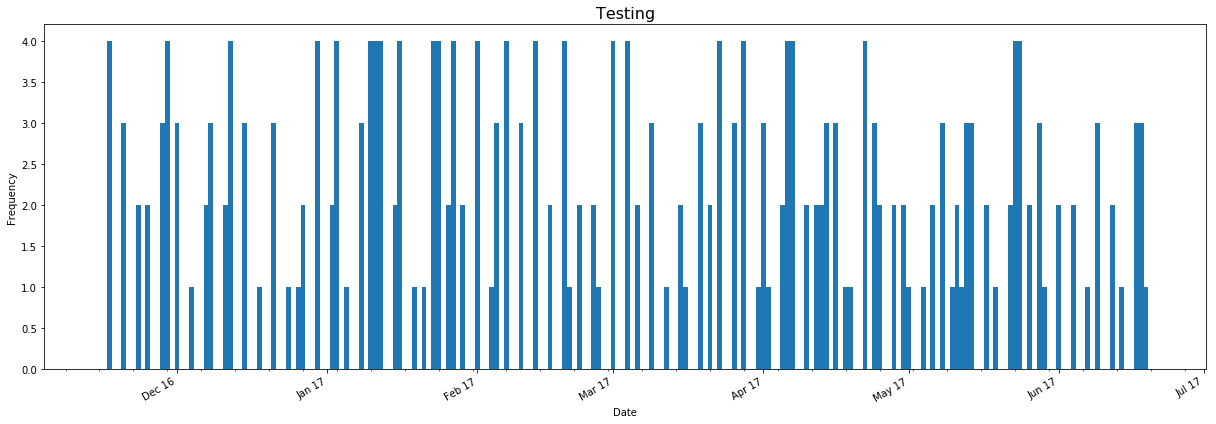

In [8]:
fig, ax = plt.subplots(1,1)
p1 = plt.bar(xxx, yyy, width=1, label='Type 1')
ax.xaxis_date()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(WeekdayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.set_title('Testing', fontsize=16)
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
fig.set_size_inches(17,6)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

In [9]:
import matplotlib as mpl
mpl.__version__numpy__

'1.7.1'